
<a id='chap-tpacp'></a>

# Exemples pratiques - Principal Component Analysis for Dimensionality Reduction in Python

**L’objectif** de cette exemlpe pratique est de présenter l’utilisation des fonctionnalités de Scikit-learn concernant l’ACP, ainsi que de contribuer à une meilleure compréhension de cette méthode d’analyse de données dans le processuse pré-traitement. 
Après une brève présentation de la classe PCA de Scikit-learn, nous examinons d’abord des données générées de façon contrôlée afin de mieux comprendre l’impact de la distribution des données sur les résultats de l’ACP. Deux exemples, basés sur des données réelles, sont ensuite repris et examinés.

## L’ACP dans Scikit-learn

Dans Scikit-learn, l’analyse en composantes principales (ACP) est mise en œuvre dans la classe `sklearn.decomposition.PCA` (voir [http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)). 

Pour définir l’analyse on appelle `PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)`. 
Les paramètres d’appel sont :

> - `n_components` : nombre de composantes à conserver (par défaut toutes, c’est à dire `min(n_samples, n_features)` où `n_samples` est le nombre de lignes de la matrice de données et `n_features` le nombre de colonnes).  
- `copy` : si `False`, la matrice de données est écrasée par les données transformées (par défaut `True`).  
- `whiten` : si `True`, les données transformées sont modifiées pour que les projections sur les axes principaux présentent une variance unitaire (par défaut `False`).  
- `svd_solver` : solveur à employer parmi `'auto'`, `'full'`, `'arpack'`, `'randomized'` (par défaut `'auto'`).  
- `tol`, `iterated_power`, `random_state` : paramètres optionnels pour solveurs spécifiques.  



Les attributs accessibles sont les suivants :

> - `explained_variance_` : array `[n_components]` dans lequel on trouve les valeurs propres en ordre décroissant.  
- `components_` : array `[n_components, n_features]` dans lequel chaque ligne correspond à un vecteur propre ; l’ordre est celui des valeurs propres.  
- `explained_variance_ratio_` : array `[n_components]` avec les valeurs propres exprimées en pourcentage de la variance expliquée.  
- `mean_` : array `[n_features]` contenant les moyennes des variables calculées lors de l’ACP.  
- `n_components_` : nombre estimé de composantes.  
- `noise_variance_` : variance du bruit estimée suivant l’approche de l’ACP probabiliste (voir lien ci-dessus).  



Les méthodes qui peuvent être employées :

> - `fit(X[, y])` : trouver les axes principaux et les valeurs propres associés à partir de la matrice de données X.  
- `fit_transform(X[, y])` : trouver les axes principaux et les valeurs propres associés, appliquer la projection sur les axes principaux (avec stockage des résultats dans la matrice de données X si `copy=False` et dans une autre matrice si `copy=True`).  
- `get_covariance()` : calculer les covariances à partir de la matrice de données.  
- `get_params([deep])` : retourner les paramètres de l’estimateur.  
- `get_precision()` : calculer la matrice de précision des données.  
- `inverse_transform(X[, y])` : re-projeter les données transformées dans l’espace initial.  
- `score(X[, y])` : valeur moyenne de la log-vraisemblance pour toutes les observations.  
- `score_samples(X)` : log-vraisemblance pour chaque observation.  
- `set_params(**params)` : donner des valeurs aux paramètres de l’estimateur.  
- `transform(X[, y])` : appliquer la projection sur les axes principaux (avec stockage des résultats dans la matrice de données X si `copy=False` et dans une autre matrice si `copy=True`).  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## ACP des données sur le sommeil des mammifères

L’ACP sera d’abord appliquée aux données concernant le sommeil des mammifères (ci joint le fichier csv mammals.csv).

In [2]:
data=pd.read_csv("mammals.csv", delimiter=';', usecols=[1,2,3,4,5,6,7,8,9,10])#, skiprows=1

In [3]:
data

,BodyW,BrainW,SWS,PS,TS,LifeSpan,GT,PI,SEI,ODI
0,6654.000,5712.0,8.35,1.8,3.30,38.6,645.0,3,5,3
1,1.000,6.6,6.30,2.0,8.30,4.5,42.0,3,1,3
2,3.385,44.5,8.35,1.8,12.50,14.0,60.0,1,1,1
3,0.920,5.7,8.35,1.8,16.50,15.1,25.0,5,2,3
4,2547.000,4603.0,2.10,1.8,3.90,69.0,624.0,3,5,4
...,...,...,...,...,...,...,...,...,...,...
57,2.000,12.3,4.90,0.5,5.40,7.5,200.0,3,1,3
58,0.104,2.5,13.20,2.6,15.80,2.3,46.0,3,2,2
59,4.190,58.0,9.70,0.6,10.30,24.0,210.0,4,3,4
60,3.500,3.9,12.80,6.6,19.40,3.0,14.0,2,1,1


## Question :

Appliquez une ACP aux données de `mammals` et affichez les valeurs propres.

### Preprocessing step

    We have to scale our data before using our PCA

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.values)

In [73]:
scaled_df = pd.DataFrame(scaled_data)

In [74]:
scaled_df

,0,1,2,3,4,5,6,7,8,9
0,7.237778,5.883379,-0.078244,-0.108003,-1.636219,1.087707,3.578151,0.088109,1.621215,0.270776
1,-0.221768,-0.299686,-0.719848,0.047722,-0.504267,-0.861297,-0.679755,0.088109,-0.891668,0.270776
2,-0.219094,-0.258613,-0.078244,-0.108003,0.446574,-0.318320,-0.552653,-1.277583,-0.891668,-1.128234
3,-0.221858,-0.300661,-0.078244,-0.108003,1.352135,-0.255448,-0.799795,1.453801,-0.263447,0.270776
4,2.632885,4.681532,-2.034353,-0.108003,-1.500385,2.825235,3.429866,0.088109,1.621215,0.970281
...,...,...,...,...,...,...,...,...,...,...
57,-0.220647,-0.293509,-1.158016,-1.120214,-1.160799,-0.689831,0.435915,0.088109,-0.891668,0.270776
58,-0.222773,-0.304129,1.439696,0.514897,1.193662,-0.987039,-0.651510,0.088109,-0.263447,-0.428729
59,-0.218191,-0.243983,0.344275,-1.042352,-0.051486,0.253236,0.506527,0.770955,0.364773,0.970281
60,-0.218965,-0.302612,1.314505,3.629393,2.008668,-0.947030,-0.877468,-0.594737,-0.891668,-1.128234



### Sklearn PCA

In [75]:
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt

In [109]:
sklearn_pca = PCA(n_components=2)
reduced_data3 = sklearn_pca.fit_transform(scaled_df.values)#ou sklearn_pca.fit_transform(scaled_data)
#print(reduced_data3)
print("Pourcentage de variance expliquée : ")
print(sklearn_pca.explained_variance_ratio_)
print("")
print("Composantes principales : ")
print(sklearn_pca.components_)


Pourcentage de variance expliquée : 
[0.48017524 0.22078825]

Composantes principales : 
[[ 0.2507328   0.28338618 -0.32111983 -0.29060816 -0.38538159  0.24828001
   0.37336221  0.25423678  0.38127144  0.33119293]
 [ 0.4417748   0.47478054  0.09769085  0.23679916  0.09113044  0.30384009
   0.26672903 -0.42588243 -0.13611297 -0.37700212]]


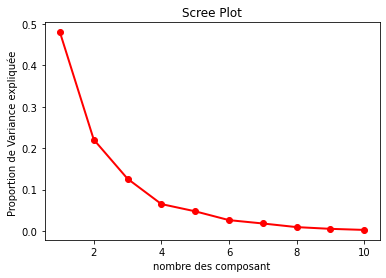

In [116]:
sklearn_pca = PCA(n_components=10)
reduced_data = sklearn_pca.fit_transform(scaled_df.values)#ou sklearn_pca.fit_transform(scaled_data)
plt.plot(np.arange(10) +1 , sklearn_pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('nombre des composant')
plt.ylabel('Proportion de Variance expliquée ')
plt.show()


###  On peut donc conclure que dans ce cas 2 dimension n'est pas suffisante car cela n'importe que 70% d'information, ainsi il faut considérer 4 ou même 5 dimension 

In [111]:
sklearn_pca = PCA(n_components=3)
reduced_data3 = sklearn_pca.fit_transform(scaled_df.values)#ou sklearn_pca.fit_transform(scaled_data)
print(reduced_data3)
print("Pourcentage de variance expliquée : ")
print(sklearn_pca.explained_variance_ratio_)
print("Composantes principales : ")
print(sklearn_pca.components_)

print(sklearn_pca.components_)
print("")


[[ 6.50530263  6.7330641   3.43983054]
 [-0.42443283 -0.80647942 -0.41704187]
 [-1.56762174  0.6345905  -1.01722639]
 [-0.60859835 -1.12707436  0.89634777]
 [ 6.19361561  4.17407302  0.36200792]
 [ 1.32018225 -0.99632356  0.2935889 ]
 [-3.4292      1.41344843  0.97171349]
 [ 2.84382529 -0.69307734 -0.26399655]
 [-1.96542103  1.23919915 -0.22277836]
 [-0.13357458  1.67456411 -1.85840701]
 [ 0.36715152 -1.59531354  1.55994725]
 [ 3.58409296 -1.3457594  -0.15784665]
 [-1.04669831  0.20950559 -0.60097281]
 [ 3.17140474 -0.8098289   0.51540609]
 [-1.28244543  0.30247268 -1.35197529]
 [ 0.22000675  0.14454502 -1.82210964]
 [-1.28463223  0.13276622 -0.08418195]
 [-0.6515225  -0.08946067 -0.43362077]
 [ 0.02525931  0.58455006 -2.39196391]
 [-3.41813771  1.6155924   1.14373672]
 [ 2.96781394 -0.77358455  1.13825451]
 [ 2.91793753 -2.18090134 -0.29609241]
 [-2.05648618 -0.07778988  0.83278801]
 [ 0.22804031  1.45558916 -0.94410872]
 [ 1.04712846  1.29117978 -2.16821901]
 [-1.53982149  0.74367027

In [113]:
sklearn_pca = PCA(n_components=4)
reduced_data3 = sklearn_pca.fit_transform(scaled_df.values)#ou sklearn_pca.fit_transform(scaled_data)
print(reduced_data3)
print("Pourcentage de variance expliquée : ")
print(sklearn_pca.explained_variance_ratio_)
print("Composantes principales : ")
print("")


[[ 6.50530263e+00  6.73306410e+00  3.43983054e+00 -2.05458566e+00]
 [-4.24432831e-01 -8.06479421e-01 -4.17041871e-01 -1.29587063e+00]
 [-1.56762174e+00  6.34590499e-01 -1.01722639e+00 -4.19560092e-01]
 [-6.08598346e-01 -1.12707436e+00  8.96347766e-01  1.98295147e-01]
 [ 6.19361561e+00  4.17407302e+00  3.62007916e-01  7.28454239e-03]
 [ 1.32018225e+00 -9.96323557e-01  2.93588898e-01  9.07090512e-01]
 [-3.42920000e+00  1.41344843e+00  9.71713494e-01  1.14103790e+00]
 [ 2.84382529e+00 -6.93077342e-01 -2.63996546e-01  6.00204791e-01]
 [-1.96542103e+00  1.23919915e+00 -2.22778365e-01  6.42768062e-01]
 [-1.33574585e-01  1.67456411e+00 -1.85840701e+00  8.49138133e-01]
 [ 3.67151520e-01 -1.59531354e+00  1.55994725e+00  5.18759032e-01]
 [ 3.58409296e+00 -1.34575940e+00 -1.57846651e-01 -8.37002190e-02]
 [-1.04669831e+00  2.09505589e-01 -6.00972809e-01 -6.39669450e-01]
 [ 3.17140474e+00 -8.09828898e-01  5.15406087e-01  1.04457487e+00]
 [-1.28244543e+00  3.02472683e-01 -1.35197529e+00 -1.44545097e

In [112]:
sklearn_pca = PCA(n_components=5)
reduced_data3 = sklearn_pca.fit_transform(scaled_df.values)#ou sklearn_pca.fit_transform(scaled_data)
print(reduced_data3)
print("Pourcentage de variance expliquée : ")
print(sklearn_pca.explained_variance_ratio_)
print("Composantes principales : ")
print(sklearn_pca.components_)
print("")


[[ 6.50530263e+00  6.73306410e+00  3.43983054e+00 -2.05458566e+00
  -1.38117895e+00]
 [-4.24432831e-01 -8.06479421e-01 -4.17041871e-01 -1.29587063e+00
   9.29470176e-02]
 [-1.56762174e+00  6.34590499e-01 -1.01722639e+00 -4.19560092e-01
  -4.47694398e-01]
 [-6.08598346e-01 -1.12707436e+00  8.96347766e-01  1.98295147e-01
  -8.08352131e-02]
 [ 6.19361561e+00  4.17407302e+00  3.62007916e-01  7.28454239e-03
   8.67628522e-01]
 [ 1.32018225e+00 -9.96323557e-01  2.93588898e-01  9.07090512e-01
  -3.88211538e-01]
 [-3.42920000e+00  1.41344843e+00  9.71713494e-01  1.14103790e+00
  -6.65447535e-03]
 [ 2.84382529e+00 -6.93077342e-01 -2.63996546e-01  6.00204791e-01
   4.60186306e-01]
 [-1.96542103e+00  1.23919915e+00 -2.22778365e-01  6.42768062e-01
   6.83827707e-01]
 [-1.33574585e-01  1.67456411e+00 -1.85840701e+00  8.49138133e-01
  -2.87380520e-01]
 [ 3.67151520e-01 -1.59531354e+00  1.55994725e+00  5.18759032e-01
  -3.00646055e-01]
 [ 3.58409296e+00 -1.34575940e+00 -1.57846651e-01 -8.37002190e-02

In [114]:
sklearn_pca = PCA(n_components=6)
reduced_data3 = sklearn_pca.fit_transform(scaled_df.values)#ou sklearn_pca.fit_transform(scaled_data)
print(reduced_data3)
print("")
print("Pourcentage de variance expliquée : ")
print(sklearn_pca.explained_variance_ratio_)
print("")
print("Composantes principales : ")
print(sklearn_pca.components_)
print("")
print(sklearn_pca.explained_variance_ratio_.cumsum()[-1])

[[ 6.50530263e+00  6.73306410e+00  3.43983054e+00 -2.05458566e+00
  -1.38117895e+00  6.00012543e-02]
 [-4.24432831e-01 -8.06479421e-01 -4.17041871e-01 -1.29587063e+00
   9.29470176e-02  3.90254452e-01]
 [-1.56762174e+00  6.34590499e-01 -1.01722639e+00 -4.19560092e-01
  -4.47694398e-01 -2.27912408e-01]
 [-6.08598346e-01 -1.12707436e+00  8.96347766e-01  1.98295147e-01
  -8.08352131e-02  1.00089723e+00]
 [ 6.19361561e+00  4.17407302e+00  3.62007916e-01  7.28454239e-03
   8.67628522e-01  5.00044061e-01]
 [ 1.32018225e+00 -9.96323557e-01  2.93588898e-01  9.07090512e-01
  -3.88211538e-01 -3.89256862e-02]
 [-3.42920000e+00  1.41344843e+00  9.71713494e-01  1.14103790e+00
  -6.65447535e-03 -9.13454239e-02]
 [ 2.84382529e+00 -6.93077342e-01 -2.63996546e-01  6.00204791e-01
   4.60186306e-01 -8.90334696e-01]
 [-1.96542103e+00  1.23919915e+00 -2.22778365e-01  6.42768062e-01
   6.83827707e-01 -2.38886630e-01]
 [-1.33574585e-01  1.67456411e+00 -1.85840701e+00  8.49138133e-01
  -2.87380520e-01  3.2708

In [115]:
sklearn_pca = PCA(n_components=7)
reduced_data3 = sklearn_pca.fit_transform(scaled_df.values)#ou sklearn_pca.fit_transform(scaled_data)
print(reduced_data3)
print("")
print("Pourcentage de variance expliquée : ")
print(sklearn_pca.explained_variance_ratio_)
print("")
print("Composantes principales : ")
print(sklearn_pca.components_)

[[ 6.50530263e+00  6.73306410e+00  3.43983054e+00 -2.05458566e+00
  -1.38117895e+00  6.00012543e-02  6.61782415e-01]
 [-4.24432831e-01 -8.06479421e-01 -4.17041871e-01 -1.29587063e+00
   9.29470176e-02  3.90254452e-01 -1.64774264e-01]
 [-1.56762174e+00  6.34590499e-01 -1.01722639e+00 -4.19560092e-01
  -4.47694398e-01 -2.27912408e-01  1.03920660e-01]
 [-6.08598346e-01 -1.12707436e+00  8.96347766e-01  1.98295147e-01
  -8.08352131e-02  1.00089723e+00 -1.23369458e-01]
 [ 6.19361561e+00  4.17407302e+00  3.62007916e-01  7.28454239e-03
   8.67628522e-01  5.00044061e-01 -4.34946607e-01]
 [ 1.32018225e+00 -9.96323557e-01  2.93588898e-01  9.07090512e-01
  -3.88211538e-01 -3.89256862e-02  1.61613854e-01]
 [-3.42920000e+00  1.41344843e+00  9.71713494e-01  1.14103790e+00
  -6.65447535e-03 -9.13454239e-02  1.72508590e-01]
 [ 2.84382529e+00 -6.93077342e-01 -2.63996546e-01  6.00204791e-01
   4.60186306e-01 -8.90334696e-01 -5.54659043e-01]
 [-1.96542103e+00  1.23919915e+00 -2.22778365e-01  6.42768062e-0

In [46]:
sklearn_pca = PCA(n_components=7)
reduced_data3 = sklearn_pca.fit_transform(scaled_df.values)#ou sklearn_pca.fit_transform(scaled_data)
print(reduced_data3)
print("")
print("Pourcentage de variance expliquée : ")
print(sklearn_pca.explained_variance_ratio_)
print("")
print("Composantes principales : ")
print(sklearn_pca.components_)
print("")
print(sklearn_pca.explained_variance_ratio_.cumsum()[-1])

[[ 6.50530263e+00  6.73306410e+00  3.43983054e+00 -2.05458566e+00
  -1.38117895e+00  6.00012543e-02  6.61782415e-01]
 [-4.24432831e-01 -8.06479421e-01 -4.17041871e-01 -1.29587063e+00
   9.29470176e-02  3.90254452e-01 -1.64774264e-01]
 [-1.56762174e+00  6.34590499e-01 -1.01722639e+00 -4.19560092e-01
  -4.47694398e-01 -2.27912408e-01  1.03920660e-01]
 [-6.08598346e-01 -1.12707436e+00  8.96347766e-01  1.98295147e-01
  -8.08352131e-02  1.00089723e+00 -1.23369458e-01]
 [ 6.19361561e+00  4.17407302e+00  3.62007916e-01  7.28454239e-03
   8.67628522e-01  5.00044061e-01 -4.34946607e-01]
 [ 1.32018225e+00 -9.96323557e-01  2.93588898e-01  9.07090512e-01
  -3.88211538e-01 -3.89256862e-02  1.61613854e-01]
 [-3.42920000e+00  1.41344843e+00  9.71713494e-01  1.14103790e+00
  -6.65447535e-03 -9.13454239e-02  1.72508590e-01]
 [ 2.84382529e+00 -6.93077342e-01 -2.63996546e-01  6.00204791e-01
   4.60186306e-01 -8.90334696e-01 -5.54659043e-01]
 [-1.96542103e+00  1.23919915e+00 -2.22778365e-01  6.42768062e-0